#GMM Model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [ ]:
train_path = "traincsv.csv"
test_path = "test.csv"

In [ ]:
train_df = pd.read_csv(train_path, dtype={'luxury_sales': str, 'fresh_sales': str, 'dry_sales': str})
test_df = pd.read_csv(test_path, dtype={'luxury_sales': str, 'fresh_sales': str, 'dry_sales': str})

In [ ]:
num_cols = ['luxury_sales', 'fresh_sales', 'dry_sales']
for col in num_cols:
    train_df[col] = pd.to_numeric(train_df[col], errors='coerce')
    test_df[col] = pd.to_numeric(test_df[col], errors='coerce')


In [ ]:
for col in num_cols:
    train_df[col] = train_df[col].fillna(train_df[col].median())
    test_df[col] = test_df[col].fillna(test_df[col].median())


In [ ]:
train_df = train_df.drop_duplicates()

In [ ]:
scaler = MinMaxScaler()
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])


In [ ]:
# GMM Clustering - Test different number of clusters
X_train = train_df[num_cols]
silhouette_scores = []
components_range = range(2, 8)  # Try 2 to 7 clusters

In [ ]:
for n in components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_train)
    labels = gmm.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)
    print(f"GMM with {n} clusters → Silhouette Score = {score:.4f}")

GMM with 2 clusters → Silhouette Score = 0.5516
GMM with 3 clusters → Silhouette Score = 0.4690
GMM with 4 clusters → Silhouette Score = 0.4126
GMM with 5 clusters → Silhouette Score = 0.3715
GMM with 6 clusters → Silhouette Score = 0.3383
GMM with 7 clusters → Silhouette Score = 0.3299


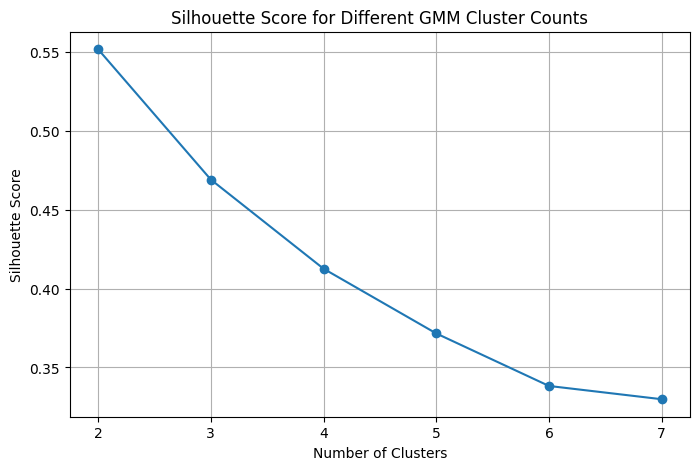

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(components_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different GMM Cluster Counts')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [ ]:
# Select best cluster count (based on max silhouette score)
optimal_clusters = components_range[np.argmax(silhouette_scores)]
print(f"\n Optimal Number of Clusters based on Silhouette Score: {optimal_clusters}")


 Optimal Number of Clusters based on Silhouette Score: 2


In [ ]:
final_gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
final_gmm.fit(X_train)

GaussianMixture(n_components=2, random_state=42)

In [ ]:
train_clusters = final_gmm.predict(X_train)
test_clusters = final_gmm.predict(test_df[num_cols])

In [ ]:
train_df['GMM_cluster'] = train_clusters
test_df['GMM_cluster'] = test_clusters

In [ ]:
print("\n Train Dataset with Cluster Labels:\n")
print(train_df[['Customer_ID', 'GMM_cluster']].head(10))

print("\n Test Dataset with Cluster Labels:\n")
print(test_df[['Customer_ID', 'GMM_cluster']].head(10))


 Train Dataset with Cluster Labels:

   Customer_ID  GMM_cluster
0     10493832            1
1     10178643            1
2     10513916            0
3     10334589            0
4     10458365            0
5     10654823            1
6     10603456            1
7     10382219            0
8     10473125            1
9     10751172            0

 Test Dataset with Cluster Labels:

   Customer_ID  GMM_cluster
0        33574            0
1        10089            0
2        38329            0
3        11376            0
4        12410            0
5          826            0
6        10364            0
7        39986            0
8        11133            0
9        32747            0
